In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import Sim_functions2 as sim_func
plt.style.use('seaborn-paper')

paraview version 5.0.1


In [2]:
# user options
calc_options1={ 
    'direction':'u',
    'sim_dir':'/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/Reference/',
    'manufactured':False,
    'method':0,
    'option':2,             # order of taylor derivative difference scheme (option 2 means second order accurate), or option for manufactured solution type
    'xi':4,                 # if box_probe [0-19] elif vtu [0-80]
    'yi':9,                 # if box_probe [0-10] elif vtu [0-90]
    'read_from':'box_probe',      # ['box_probe','vtu']
    'sim_var':'U',
            }

<IPython.core.display.Javascript object>


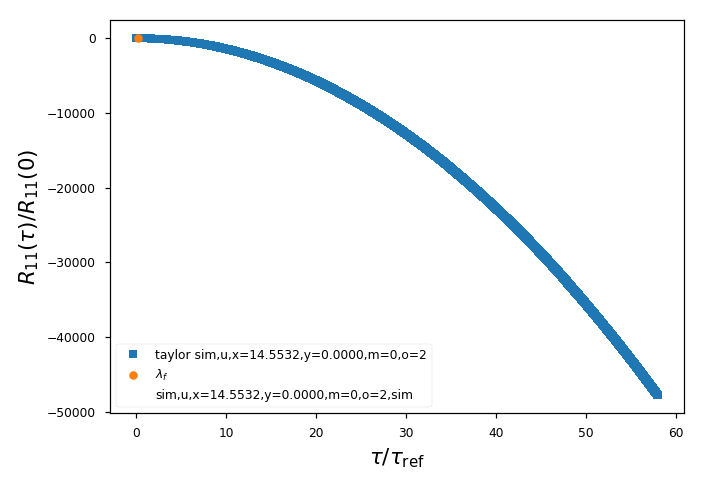

  simulation reading U-X from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Reference/
  simulation reading X from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Reference/
  simulation reading Y from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Reference/
  simulation reading Z from /home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Reference/
T=  2.52674613752
TaylorT= 0.265015815387


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [3]:
# plot
fig=plt.figure()
ax=plt.subplot(111)
# normal simulation with nudging
calc_options1['sim_dir']='/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Reference/'
sim=sim_func.sim(calc_options1)
sim.R11_tau_calc_plot(ax,label='sim')
plt.tight_layout()

# Run Once!  Output data to txt file

In [ ]:
with open(sim.sim_dir+'R11_output/R11.txt','a') as f_handle:
    for xi in range(20):
        sim.xi=xi
        for yi in range(10):
            sim.yi=yi
            sim.R11_tau_calc_save(f_handle)

## Read and plot data

In [ ]:
# read in data
fname=sim.sim_dir+'R11_output_box_probe/R11.txt'
print 'reading data from ',fname
XYLlam=np.genfromtxt(fname)
y=XYLlam[:,0].reshape(20,10).T
x=XYLlam[:,1].reshape(20,10).T
T=XYLlam[:,2].reshape(20,10).T
TaylorT=XYLlam[:,3].reshape(20,10).T

In [ ]:
# plot data
fig=plt.figure()
plt.colorbar(plt.contourf(x,y,T,300))
plt.xlabel('r')
plt.ylabel('z')
plt.title(r'integral $\tau$')
plt.axis('scaled')

# plot taylor
fig=plt.figure()
plt.colorbar(plt.contourf(x,y,TaylorT,300))
plt.xlabel('r')
plt.ylabel('z')
plt.title(r'taylor $\tau$')
plt.axis('scaled')

# plot taylor
fig=plt.figure()
plt.colorbar(plt.contourf(x[2:,:],y[2:,:],TaylorT[2:,:],300))
plt.xlabel('r')
plt.ylabel('z')
plt.title(r'taylor $\tau$')
plt.axis('scaled')

plt.show()

In [ ]:
# plot taylor along center line
fig=plt.figure()
plt.plot(y[-1,:],TaylorT[-1,:])
plt.xlabel('z/D')
plt.ylabel(r'$\tau$')
plt.title(r'taylor $\tau$')
plt.show()

In [ ]:
TaylorT.shape